# HW Week 3 - Statistical Learning: Distance and KNN
### Jonathan Gragg - East Section

## Part One: Distance and Similarity Metrics

### 1. Load the Ames housing data. Create a matrix with the following variables and standardize the: Sale_Price, Lot_Area, Year_Built, Gr_Liv_Area, Total_Bsmt_SF, and Full_Bath. Randomly select five (5) rows from the matrix and print them.  (5 pts)

In [53]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV, Lasso, Ridge
from sklearn.model_selection import KFold, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score,\
    recall_score, precision_score, roc_curve, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import warnings
warnings.filterwarnings(action='ignore')

ames = pd.read_csv('ames.csv')
cols = ['Sale_Price', 'Lot_Area', 'Year_Built', 'Gr_Liv_Area', 'Total_Bsmt_SF', 'Full_Bath']
data = ames[cols].copy()
data = data.dropna()
scaler = StandardScaler()
data = scaler.fit_transform(data)
idx = np.random.randint(data.shape[0], size=5)
small_data = data[idx, :]
small_data

array([[ 0.05263277,  0.13442342,  0.84799991,  0.02237644, -0.56534299,
         0.7840283 ],
       [ 1.95389963, -0.00481323,  1.21175413,  0.72475893,  1.82979727,
         0.7840283 ],
       [-0.26036389, -0.18910822, -0.21019419, -0.34761097,  0.08334083,
         0.7840283 ],
       [-0.51702114, -0.12767656, -2.35965095,  0.25188734, -0.57668362,
         0.7840283 ],
       [-0.0913457 , -0.17501956,  1.11254844, -0.61273563,  0.26705897,
         0.7840283 ]])

### 2. Create distance matrices for these five (5) observations with the following metrics. Print each distance matrix. Which points are closest and farthest from each other? Are they the same with each metric? (15 pts)

* Euclidean distance

In [54]:
euc = pairwise_distances(small_data,metric='euclidean')
euc

array([[0.        , 3.16173334, 1.37116584, 3.27643555, 1.13257717],
       [3.16173334, 0.        , 3.34050174, 4.98901162, 2.90738423],
       [1.37116584, 3.34050174, 0.        , 2.34197388, 1.37202665],
       [3.27643555, 4.98901162, 2.34197388, 0.        , 3.70122736],
       [1.13257717, 2.90738423, 1.37202665, 3.70122736, 0.        ]])

* Manhattan distance

In [55]:
man = pairwise_distances(small_data,metric='manhattan')
man

array([[0.        , 5.50178049, 2.71339362, 4.28025628, 2.18548399],
       [5.50178049, 0.        , 6.63933317, 9.04454167, 5.21489021],
       [2.71339362, 6.63933317, 0.        , 3.72706843, 1.95469229],
       [4.28025628, 9.04454167, 3.72706843, 0.        , 5.65358339],
       [2.18548399, 5.21489021, 1.95469229, 5.65358339, 0.        ]])

* Minkowski distance with p=0.5

In [56]:
mink = pairwise_distances(small_data,metric='minkowski', p=0.5)
mink

array([[ 0.        , 22.47552328, 12.7493277 , 13.2734027 ,  9.98157819],
       [22.47552328,  0.        , 29.88677057, 36.61691626, 20.83235166],
       [12.7493277 , 29.88677057,  0.        , 14.49524285,  6.88246639],
       [13.2734027 , 36.61691626, 14.49524285,  0.        , 20.99300176],
       [ 9.98157819, 20.83235166,  6.88246639, 20.99300176,  0.        ]])

In all three matrixes it seams 1, 3, and 5 are the points that are closest to each other. Each matrix has a different value however with the Minkowski distance being the largest range of distances. Also in the minkowski matrix it doesn't appear that 1 and 3 are as close as they appear in the other two matrixes.

### 3. Create similarity matrices for these five (5) observations with the following kernels. Print each similarity matrix. Which points are most similar to each other? Are they the same with each kernel? Are they the same points that were closest in question two (2)? (15 pts)

* Gaussian kernel (use gamma = 1.0)

<AxesSubplot:>

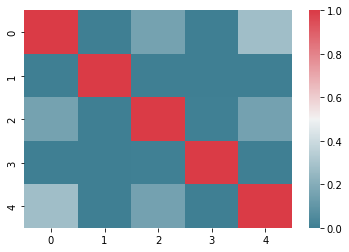

In [57]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
k = pairwise_kernels(small_data, metric='rbf', gamma = 1)
sns.heatmap(k, cmap=cmap)

* Laplace kernel (use gamma = 1.0)

<AxesSubplot:>

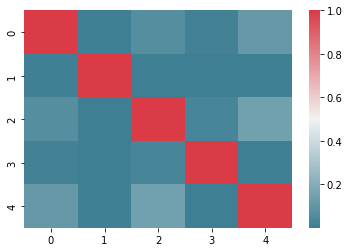

In [58]:
l = pairwise_kernels(small_data, metric='laplacian', gamma = 1)
sns.heatmap(l, cmap=cmap)

* Cosine kernel

<AxesSubplot:>

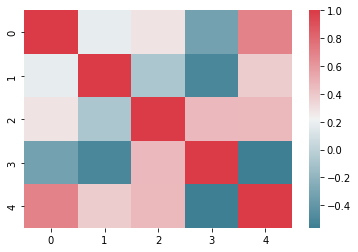

In [59]:
c = pairwise_kernels(small_data, metric='cosine')
sns.heatmap(c, cmap=cmap)

The Gaussian and the Laplace charts look fairly similar in considering the distance between each point. The Cosine is completely different with its results. The first two seem to align with the first two matrixes in part 3 and Cosine seems to align with Minkowski.

## Part Two: K-NN and Kernel Smoothing Methods

### 1. Create a data matrix for the explanatory variables and vector for the response. Print the first few rows of the feature matrix. (5 pts)

In [60]:
cols = ['Lot_Area', 'Year_Built', 'Gr_Liv_Area', 'Total_Bsmt_SF', 'Full_Bath']
X = ames[cols].copy().values

y = ames['Sale_Price'].values

print('Feature Matrix')
print(X[:4,])

print('Sale Price')
print(y[:4,])

Feature Matrix
[[31770  1960  1656  1080     1]
 [11622  1961   896   882     1]
 [14267  1958  1329  1329     1]
 [11160  1968  2110  2110     2]]
Sale Price
[215000 105000 172000 244000]


### 2. Randomly split the data into 70% training and 30% test data. Print the dimensions of each matrix/vector. (5 pts)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

print('Training Feature Set has', X_train.shape[0], 'rows and', X_train.shape[1], 'columns.')
print('Testing Feature Set has', X_test.shape[0], 'rows and', X_test.shape[1], 'columns.')

print('Training Response variable has', y_train.shape[0], 'rows and', '1 column.')
print('Testing Response variable has', y_test.shape[0], 'rows and', '1 column.')

Training Feature Set has 2051 rows and 5 columns.
Testing Feature Set has 879 rows and 5 columns.
Training Response variable has 2051 rows and 1 column.
Testing Response variable has 879 rows and 1 column.


### 3. Standardize the training data and apply the same transformation to the test data. Print the first few rows of the training feature matrix. (10 pts)

In [62]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)

scaler = StandardScaler()
scaler.fit(X_test)
X_test = scaler.fit_transform(X_test)

print('Training Data Set after Standardization')
print(X_train[:4,])

Training Data Set after Standardization
[[-0.97209932  0.04042477 -0.55316242 -0.86053257 -1.03239672]
 [-0.19444473 -1.86519577 -1.1024331  -1.88243835 -1.03239672]
 [-0.18728984  1.14367877  0.45772937 -0.45938973  0.78984568]
 [-0.20687782 -0.29389462 -0.84532767  0.00674273 -1.03239672]]


### 4. Fit a K-nearest neighbor regression model on the training data using Euclidean distance. Use 5-fold cross validation to choose the best K in terms of RSME. Report the CV error for each choice of K considered. (20 pts)

In [79]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV

ks = np.arange(3, 30)
rmse = []
cverror = []
score = []

for k in ks:
    knn = KNeighborsRegressor(n_neighbors=k, p=2)
    knncv = cross_validate(knn, X=X_train, y=y_train, cv=5, scoring='neg_root_mean_squared_error')
    rmse.append(knncv['test_score'].mean())
    cverror.append(cross_val_score(knn,X_test,y_test,cv=5).mean())
#plt.plot(ks,rmse)
#plt.xlabel('K Neighbors')
#plt.ylabel('RMSE')
print(pd.DataFrame({'K Neighbors':ks, 'CV Error':rmse}))


    K Neighbors      CV Error
0             3 -36340.107730
1             4 -35785.409738
2             5 -35193.697203
3             6 -35240.855028
4             7 -35223.791511
5             8 -35262.652429
6             9 -35066.452207
7            10 -35046.229820
8            11 -35124.691922
9            12 -35439.583148
10           13 -35410.140488
11           14 -35589.981048
12           15 -35709.106415
13           16 -35693.244752
14           17 -35885.934961
15           18 -36012.011300
16           19 -36098.661501
17           20 -36140.836802
18           21 -36217.850956
19           22 -36360.538600
20           23 -36332.224276
21           24 -36437.496835
22           25 -36511.862472
23           26 -36473.572516
24           27 -36668.039875
25           28 -36716.959109
26           29 -36791.687191


### 5. Implement and fit a kernel smoothed regression model using the Laplace kernel. Use 5-fold cross validation to choose the best tuning parameter gamma in terms of RSME. Report the average CV error for each choice of gamma considered. (20 pts)

In [78]:
from sklearn.model_selection import GridSearchCV

def laplace(gamma):    
    def kernel(distance):
        return np.exp(-gamma * distance)
    return kernel

gam = np.arange(0.1,10.0,0.4)
cverror = []
rmse = []

for g in gam:
    knn = KNeighborsRegressor(50, weights=laplace(g), metric='minkowski', p=1)
    knncv = cross_validate(knn, X=X_train, y=y_train, cv=5, scoring='neg_root_mean_squared_error')
    rmse.append(knncv['test_score'].mean())
    cverror.append(cross_val_score(knn,X_test,y_test,cv=5).mean())

pd.DataFrame({'Gamma':gam,'CV Error':rmse})

,Gamma,CV Error
0,0.1,-37402.683827
1,0.5,-35714.884056
2,0.9,-34448.160673
3,1.3,-33488.716918
4,1.7,-32934.381770
5,2.1,-32685.392116
6,2.5,-32629.619138
7,2.9,-32687.480061
8,3.3,-32809.334868
9,3.7,-32967.038384


### 6. Use the best K-NN model and the best kernel smoothed model to make predictions on the test data and report the RMSE and mean absolute error (MAE) from each. Which model would you prefer? Consider other constraints beyond prediction error. (5 pts)

In [82]:
knn = KNeighborsRegressor(n_neighbors=10, p=2)
knn.fit(X_train,y_train)
knn_preds = knn.predict(X_test)
print('K-NN model accuracy with 10 Neighbors:',knn.score(X_train,y_train))
print('RMSE:', np.sqrt(mean_squared_error(y_test,knn_preds)))
print('MAE:',mean_absolute_error(y_test,knn_preds))

K-NN model accuracy with 11 Neighbors: 0.8428275187882502
RMSE: 34225.68529066052
MAE: 22140.062571103528


In [83]:
knn = KNeighborsRegressor(50, weights=laplace(2.5), metric='minkowski', p=1)
knn.fit(X_train,y_train)
knn_preds = knn.predict(X_test)
print('Kernel Smoothing Model with gamma of 2.5:',knn.score(X_train,y_train))
print('RMSE:', np.sqrt(mean_squared_error(y_test,knn_preds)))
print('MAE:',mean_absolute_error(y_test,knn_preds))

Kernel Smoothing Model with gamma of 2.5: 0.9257150026709264
RMSE: 33059.54784921527
MAE: 21523.05763896334


Based on accuracy and RMSE and MAE I would chose the Kernel Smoothing model to make predictions about housing prices in Ames. It seems to perform much better on the test data set and will lead to more accurate predictions.